In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
torch.set_default_dtype(torch.float64)
import torch.nn as nn
import copy
import random

In [2]:
import config as cfg
from model import DeepNN
from utils import relative_l2, set_seed
from train_reg import train_model_reg
from train_pde import train_model_pde

In [5]:
set_seed(0)
model_E = DeepNN().cuda()
model_T = DeepNN().cuda()
[model_E, model_T] = train_model_reg(model_E, model_T, Nfit=700, lr_E=1e-3, lr_T=1e-3)

E: lbfgs : 0 - ref_rl2 6.5668e-01 
T: lbfgs : 0 - ref_rl2 8.9771e-01 
E: lbfgs : 50 - ref_rl2 1.8595e-02 
T: lbfgs : 50 - ref_rl2 7.6450e+01 
E: lbfgs : 100 - ref_rl2 4.8865e-03 
T: lbfgs : 100 - ref_rl2 1.7458e-01 
E: lbfgs : 150 - ref_rl2 1.9964e-03 
T: lbfgs : 150 - ref_rl2 1.8742e-01 
E: lbfgs : 200 - ref_rl2 6.5696e-04 
T: lbfgs : 200 - ref_rl2 1.6409e-02 
E: lbfgs : 250 - ref_rl2 4.2137e-04 
T: lbfgs : 250 - ref_rl2 1.5010e-02 
E: lbfgs : 300 - ref_rl2 3.9282e-04 
T: lbfgs : 300 - ref_rl2 4.6905e-03 
E: lbfgs : 350 - ref_rl2 3.7640e-04 
T: lbfgs : 350 - ref_rl2 2.9358e-03 
E: lbfgs : 400 - ref_rl2 3.6684e-04 
T: lbfgs : 400 - ref_rl2 2.3922e-03 
E: lbfgs : 450 - ref_rl2 3.6129e-04 
T: lbfgs : 450 - ref_rl2 1.5954e-03 
E: lbfgs : 500 - ref_rl2 3.5792e-04 
T: lbfgs : 500 - ref_rl2 1.5356e-03 
E: lbfgs : 550 - ref_rl2 3.5563e-04 
T: lbfgs : 550 - ref_rl2 1.5045e-03 
E: lbfgs : 600 - ref_rl2 3.5399e-04 
T: lbfgs : 600 - ref_rl2 1.4856e-03 
E: lbfgs : 650 - ref_rl2 3.5269e-04 
T: lbfg

In [6]:
set_seed(50)
model_E_cur = DeepNN().cuda()
model_E_cur.load_state_dict(copy.deepcopy(model_E.state_dict()))
model_T_cur = DeepNN().cuda()
model_T_cur.load_state_dict(copy.deepcopy(model_T.state_dict()))
[model_E_cur, model_T_cur] = train_model_pde(model_E_cur, model_T_cur, Nfit=100, lr_E=1e-1, lr_T=1e-1)

E: adam : 0 - ref_rl2 3.5564e-04 - pde 6.4807e-05 - lbc 5.7183e-04 - rbc 2.4150e-06 - tbc 1.3808e+00 - bbc 8.2320e-04
T: adam : 0 - ref_rl2 1.7111e-03 - pde 2.0167e-04 - lbc 1.2420e-04 - rbc 3.3719e-02 - tbc 2.3513e-03 - bbc 1.2829e-04
E: adam : 10 - ref_rl2 1.8940e-04 - pde 6.4201e-05 - lbc 2.1346e-04 - rbc 9.5333e-07 - tbc 5.7021e-01 - bbc 3.5294e-04
T: adam : 10 - ref_rl2 1.4542e-03 - pde 1.6201e-04 - lbc 5.3910e-05 - rbc 3.1298e-02 - tbc 1.0421e-03 - bbc 1.4961e-04
E: adam : 20 - ref_rl2 1.0240e-04 - pde 6.3865e-05 - lbc 1.6082e-04 - rbc 6.4559e-07 - tbc 4.9639e-01 - bbc 1.6464e-04
T: adam : 20 - ref_rl2 1.3499e-03 - pde 1.4591e-04 - lbc 1.1828e-04 - rbc 3.1182e-02 - tbc 6.5977e-04 - bbc 1.4499e-04
E: adam : 30 - ref_rl2 7.7224e-05 - pde 6.3768e-05 - lbc 8.3899e-05 - rbc 4.3496e-07 - tbc 3.2076e-01 - bbc 8.6024e-05
T: adam : 30 - ref_rl2 1.2544e-03 - pde 1.3115e-04 - lbc 1.1136e-04 - rbc 3.1054e-02 - tbc 1.2871e-03 - bbc 1.2811e-04
E: adam : 40 - ref_rl2 6.4632e-05 - pde 6.3719e-05

In [7]:
X = cfg.X.detach().cpu()
Y = cfg.Y.detach().cpu()
E_reg = model_E(cfg.inp_fine, cfg.Z_fine).detach().cpu().reshape(cfg.Nx, cfg.Ny)
E_pinn = model_E_cur(cfg.inp_fine, cfg.Z_fine).detach().cpu().reshape(cfg.Nx, cfg.Ny)
E_ref = cfg.E_ref.cpu()
T_reg = model_T(cfg.inp_fine, cfg.Z_fine).detach().cpu().reshape(cfg.Nx, cfg.Ny)
T_pinn = model_T_cur(cfg.inp_fine, cfg.Z_fine).detach().cpu().reshape(cfg.Nx, cfg.Ny)
T_ref = cfg.T_ref.cpu()

In [8]:
print('E: Regression Solution rl2: {:.4e}'.format(relative_l2(E_ref, E_reg)))
print('E: PINN Solution rl2: {:.4e}'.format(relative_l2(E_ref, E_pinn)))

print('T: Regression Solution rl2: {:.4e}'.format(relative_l2(T_ref, T_reg)))
print('T: PINN Solution rl2: {:.4e}'.format(relative_l2(T_ref, T_pinn)))

E: Regression Solution rl2: 3.5218e-04
E: PINN Solution rl2: 1.8994e-05
T: Regression Solution rl2: 1.4630e-03
T: PINN Solution rl2: 5.0084e-04


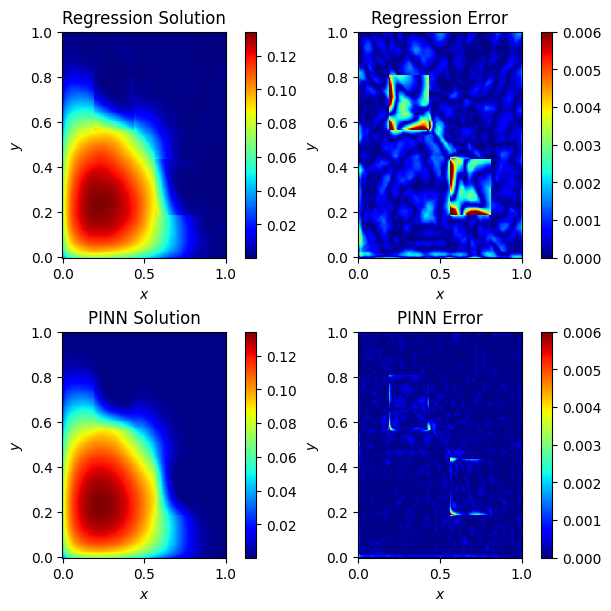

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6), layout='constrained')

vmin = E_ref.min()
vmax = E_ref.max()

pcm = axs[0][0].pcolormesh(X, Y, E_reg, vmin=vmin, vmax=vmax, cmap='jet')
axs[0][0].set_title("Regression Solution")
axs[0][0].set_xlabel("$x$")
axs[0][0].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[0][0])

pcm = axs[0][1].pcolormesh(X, Y, (E_ref - E_reg).abs(), vmin=0, vmax=0.006, cmap='jet')
axs[0][1].set_title("Regression Error")
axs[0][1].set_xlabel("$x$")
axs[0][1].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[0][1])

pcm = axs[1][0].pcolormesh(X, Y, E_pinn, vmin=vmin, vmax=vmax, cmap='jet')
axs[1][0].set_title("PINN Solution")
axs[1][0].set_xlabel("$x$")
axs[1][0].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[1][0])

pcm = axs[1][1].pcolormesh(X, Y, (E_ref - E_pinn).abs(), vmin=0, vmax=0.006, cmap='jet')
axs[1][1].set_title("PINN Error")
axs[1][1].set_xlabel("$x$")
axs[1][1].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[1][1])

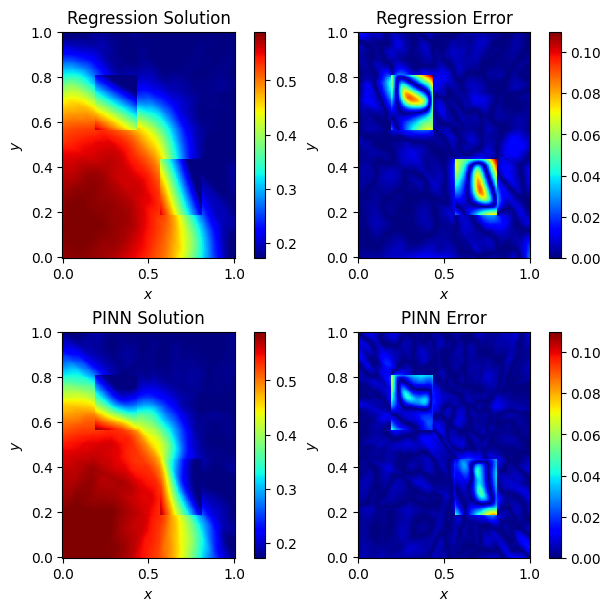

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6), layout='constrained')

vmin = T_ref.min()
vmax = T_ref.max()

pcm = axs[0][0].pcolormesh(X, Y, T_reg, vmin=vmin, vmax=vmax, cmap='jet')
axs[0][0].set_title("Regression Solution")
axs[0][0].set_xlabel("$x$")
axs[0][0].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[0][0])

pcm = axs[0][1].pcolormesh(X, Y, (T_ref - T_reg).abs(), vmin=0, vmax=0.11, cmap='jet')
axs[0][1].set_title("Regression Error")
axs[0][1].set_xlabel("$x$")
axs[0][1].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[0][1])

pcm = axs[1][0].pcolormesh(X, Y, T_pinn, vmin=vmin, vmax=vmax, cmap='jet')
axs[1][0].set_title("PINN Solution")
axs[1][0].set_xlabel("$x$")
axs[1][0].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[1][0])

pcm = axs[1][1].pcolormesh(X, Y, (T_ref - T_pinn).abs(), vmin=0, vmax=0.11, cmap='jet')
axs[1][1].set_title("PINN Error")
axs[1][1].set_xlabel("$x$")
axs[1][1].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[1][1])